#### TP : projet de Data visualisation

###### Dans ce mini TP, nous allons réaliser une analyse graphique des données sur la malnutrition. 

### Définition 

La malnutrition est un état physiopathologique résultant de l'influence combinée de la sur- ou sous-nutrition (déficience ou excès de calories ou d’un ou plusieurs nutriments) et d'autres facteurs (génétiques, inflammatoires...) sur la composition du corps1 et sur ses fonctions biologiques. Son origine peut être une quantité de nourriture inadaptée au besoin (apport calorique insuffisant ou excessif) ou l'ingestion d'aliments de mauvaise qualité (carences nutritionnelles ou excès de sucre, de protéines, de sel, de graisses…) ; d'autres facteurs, notamment psychologiques et pathologiques, interviennent également.

### Importer les librairies nécessaires et charger les données

In [22]:
# import des librairies classiques
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px

# importation du fichier malnuttrion-estimation.csvs
data= pd.read_csv("C:/Users/makha/Documents/Doc/CoursM1/Python/Projet/ProJet_Malnutrition/PAPE MAKHA DIOP(ProJet_EDA)/malnutrition-estimates.csv")

# on supprime les colonnes non utilisés
data.drop(['Unnamed: 0','ISO code','Survey Year','Source','Report Author','Notes','Short Source'], axis=1, inplace=True)
data.head()


# on s'assure que le dataset est correctement chargé 
data.head()

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,3838.877
1,AFGHANISTAN,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,4789.353
2,AFGHANISTAN,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,5444.573
3,AFGHANISTAN,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,5601.443
4,ALBANIA,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,309.225


### Affichage des données et commentaire du dataset

In [23]:
# informations sur le contenu de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                924 non-null    object 
 1   Year                   924 non-null    int64  
 2   Income Classification  924 non-null    int64  
 3   LDC                    924 non-null    float64
 4   LIFD                   924 non-null    float64
 5   LLDC or SID2           924 non-null    float64
 6   Survey Sample (N)      861 non-null    object 
 7   Severe Wasting         696 non-null    float64
 8   Wasting                877 non-null    float64
 9   Overweight             788 non-null    float64
 10  Stunting               887 non-null    float64
 11  Underweight            902 non-null    float64
 12  U5 Population ('000s)  924 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 94.0+ KB


###### Le dataset contient beaucoup de données dont 923 lignes et finalement 13 colonnes. 

Les colonnes correspondent à:

###### Country : correspond aux pays
###### Year : correspond à l'anné  
###### Income Classification : l'indice de Classification des revenus
###### LDC :indice des pays en voie de développement
###### LIFD : pourcentage d'Insuffisance alimentaire à faible revenu
###### LLDC or SID2 :l'indice des pays sous-développés 
###### Survey Sample (N) :indice d'Échantillon d'enquête (N)
###### Severe Wasting :Dépérissement grave
###### Wasting :Dépriciment
###### Overweight :indice de  surpoids
###### Stunting :le taux de Retard de croissance
###### Underweight :indice de poids insuffisant
###### U5 Population ('000s): la population U5

In [24]:
# La liste des pays présent dans mon dataset
data['Country'].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA', 'ARGENTINA',
       'ARMENIA', 'AUSTRALIA', 'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA (PLURINATIONAL STATE OF)', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM', 'BULGARIA',
       'BURKINA FASO', 'BURUNDI', 'CABO VERDE', 'CAMBODIA', 'CAMEROON',
       'CANADA', 'CENTRAL AFRICAN REPUBLIC (THE)', 'CHAD', 'CHILE',
       'CHINA', 'COLOMBIA', 'COMOROS (THE)', 'CONGO (THE)', 'COSTA RICA',
       "COTE D'IVOIRE", 'CUBA', 'CZECHIA',
       "DEMOCRATIC PEOPLE'S REP. OF KOREA (THE)",
       'DEMOCRATIC REP. OF THE CONGO (THE)', 'DJIBOUTI',
       'DOMINICAN REPUBLIC (THE)', 'ECUADOR', 'EGYPT', 'EL SALVADOR',
       'EQUATORIAL GUINEA', 'ERITREA', 'ESWATINI', 'ETHIOPIA', 'FIJI',
       'GABON', 'GAMBIA (THE)', 'GEORGIA', 'GERMANY', 'GHANA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HAITI',
       'HONDURAS', 'INDIA', 'INDONESIA'

In [25]:
#affichage des données numériques 
data.describe()

,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.000000,924.00000,924.000000,924.000000,924.000000,696.000000,877.000000,788.000000,887.000000,902.000000,924.000000
mean,2003.730519,1.24026,0.349567,0.424242,0.455628,2.191523,6.955644,6.434772,29.063134,15.841242,6182.704516
std,8.792535,0.92202,0.477091,0.494495,0.686648,1.912586,5.039402,4.638849,15.834657,12.509643,16795.938144
min,1983.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1996.000000,1.00000,0.000000,0.000000,0.000000,0.800000,2.900000,2.900000,16.650000,4.925000,559.669000
50%,2004.500000,1.00000,0.000000,0.000000,0.000000,1.600000,5.900000,5.500000,29.200000,13.400000,1795.523000
75%,2011.000000,2.00000,1.000000,1.000000,1.000000,2.900000,9.700000,8.700000,40.200000,23.100000,4194.214000
max,2019.000000,3.00000,1.000000,1.000000,2.000000,12.900000,25.300000,30.100000,73.600000,66.800000,132966.782000


### Traitement des données manquantes

In [26]:
#identification des valeurs vides
data.isnull().sum()

Country                    0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Survey Sample (N)         63
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
U5 Population ('000s)      0
dtype: int64

On constate qu'il manque 63 données pour la colonne 'Survey Sample (N)' ET 47 pour la colonne 'Wasting'. 

Il manque également 37 valeur pour la colonne 'Stunting' et 22 pour la colonne 'Underweight'.
Pour ces deux colonnes le nombre de données manquantes n'est pas trop important.

En revanche, il manque beaucoup d'informations pour la colonne 'Severe Wasting' dont 228 et 136 pour la colonne 'Overweight'. 

In [27]:
#afficher le % de données manquantes
def donnees_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        pourcentage = round((dataset[colonne].isnull().sum()/dataset.shape[0]) * 100, 2)
        print ("Données manquantes pour {}: {}%".format(colonne,pourcentage))
        #print(f"Percentage of missing values in :" {round(sum(pd.isnull(dataset.[colonne]))/dataset.shape[0],2)}\n")
    
donnees_manquantes(data, ['Survey Sample (N)', 'Severe Wasting' , 'Overweight','Stunting','Underweight' ])

Données manquantes pour Survey Sample (N): 6.82%
Données manquantes pour Severe Wasting: 24.68%
Données manquantes pour Overweight: 14.72%
Données manquantes pour Stunting: 4.0%
Données manquantes pour Underweight: 2.38%


In [28]:
# Récupération des indices des données manquantes
def position_donnes_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        index_missing = dataset[pd.isnull(dataset[colonne])].index
        print(list(index_missing))
    
position_donnes_manquantes(data,['Survey Sample (N)', 'Severe Wasting' , 'Overweight','Stunting','Underweight'])

[3, 22, 30, 31, 63, 92, 101, 102, 121, 136, 137, 143, 151, 222, 260, 275, 292, 301, 348, 364, 368, 371, 434, 435, 465, 487, 498, 590, 591, 592, 594, 613, 614, 658, 659, 660, 675, 691, 693, 718, 770, 789, 791, 809, 818, 821, 834, 840, 841, 868, 869, 870, 871, 872, 873, 875, 876, 891, 893, 897, 898, 903, 907]
[0, 4, 9, 19, 20, 22, 28, 30, 31, 32, 34, 38, 39, 40, 41, 66, 74, 78, 80, 81, 82, 92, 95, 97, 118, 122, 123, 137, 143, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 175, 177, 183, 187, 191, 192, 193, 194, 195, 196, 197, 198, 199, 206, 207, 209, 210, 212, 216, 221, 222, 230, 233, 243, 244, 245, 260, 269, 276, 280, 288, 292, 309, 321, 322, 327, 333, 334, 335, 340, 341, 343, 349, 350, 351, 352, 353, 354, 357, 358, 360, 365, 366, 367, 369, 371, 372, 376, 407, 416, 417, 418, 433, 434, 435, 442, 443, 451, 452, 467, 468, 471, 475, 481, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 500, 512, 514, 522, 523, 524, 526, 532, 549, 556, 557, 558, 559, 560, 57

Ici on constate que les données manquantes sont très nombreuses. Leurs suppression peut représentré une réduction drastique du nombre de données.

Ainsi, on opte pour le remplacement des données manquantes par la valeure moyenne.

Aussi on  s'aperçoit que la donnée 'Survey Sample (N)' n'est pas numérique ducoup il ne s'affiche pas dans (data.describe())
il faut donc changer le "type"

In [29]:
# changement du type de la colonne Survey Sample (N)
data['Survey Sample (N)'] = pd.to_numeric(data['Survey Sample (N)'],errors='coerce')

In [30]:
columns = list(['Survey Sample (N)','Severe Wasting', 'Wasting','Overweight', 'Stunting', 'Underweight'])

print('Statistiques descriptives avant imputation pour les colonnes avec des valeurs manquantes: \n', '--'*35)
display(data[columns].describe().T)

data['Survey Sample (N)'].fillna(data['Survey Sample (N)'].mean(), inplace=True)
data['Wasting'].fillna(data['Wasting'].mean(), inplace=True)
data['Severe Wasting'].fillna(data['Severe Wasting'].mean(), inplace=True)
data['Overweight'].fillna(data['Overweight'].mean(), inplace=True)
data['Stunting'].fillna(data['Stunting'].mean(), inplace=True)
data['Underweight'].fillna(data['Underweight'].mean(), inplace=True)

print('Statistiques descriptives après imputation: \n', '--'*35)
display(data[columns].describe().T)


Statistiques descriptives avant imputation pour les colonnes avec des valeurs manquantes: 
 ----------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Survey Sample (N),50.0,697.940000,206.132750,267.0,586.000,730.5,872.0,981.0
Severe Wasting,696.0,2.191523,1.912586,0.0,0.800,1.6,2.9,12.9
Wasting,877.0,6.955644,5.039402,0.0,2.900,5.9,9.7,25.3
Overweight,788.0,6.434772,4.638849,0.0,2.900,5.5,8.7,30.1
Stunting,887.0,29.063134,15.834657,0.0,16.650,29.2,40.2,73.6
Underweight,902.0,15.841242,12.509643,0.0,4.925,13.4,23.1,66.8


Statistiques descriptives après imputation: 
 ----------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Survey Sample (N),924.0,697.940000,47.494595,267.0,697.940,697.940000,697.940,981.0
Severe Wasting,924.0,2.191523,1.659635,0.0,1.100,2.191523,2.500,12.9
Wasting,924.0,6.955644,4.909421,0.0,3.100,6.200000,9.500,25.3
Overweight,924.0,6.434772,4.283480,0.0,3.475,6.300000,8.100,30.1
Stunting,924.0,29.063134,15.514032,0.0,17.200,29.063134,39.825,73.6
Underweight,924.0,15.841242,12.359658,0.0,5.000,13.800000,22.800,66.8


In [31]:
# on vérifie si les donnés on été traités 
data.isna().sum()

Country                  0
Year                     0
Income Classification    0
LDC                      0
LIFD                     0
LLDC or SID2             0
Survey Sample (N)        0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

on constate que toutes les donnés vides ont été remplies 

### Réprésentation graphique

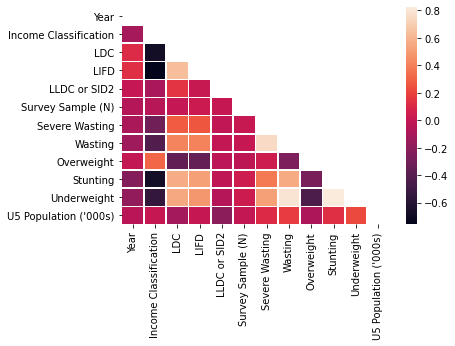

In [32]:
#heatmap se prete bien à cette représentation
corr = data.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5 )#, annot = True)

In [33]:
# la matrice de corréalation
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.7) & (sort < 1)])

Stunting               Underweight              0.825156
Underweight            Stunting                 0.825156
                       Wasting                  0.790798
Wasting                Underweight              0.790798
LIFD                   Income Classification    0.758462
Income Classification  LIFD                     0.758462
Wasting                Severe Wasting           0.756433
Severe Wasting         Wasting                  0.756433
dtype: float64

##### Observation: Comme prévu, le retard de croissance, l'insuffisance pondérale et l'émaciation sont fortement corrélés.

### Quel pays affiche le pourcentage d'insuffisance pondérale le plus élevé?

In [34]:
country = data.loc[:,['Country','Underweight']]
country['percunder'] = country.groupby('Country')['Underweight'].transform('max')
country = country.drop('Underweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

on constate qu'il sagit du Bangladesh

### Quel pays affiche le pourcentage de surpoids le plus élevé?

In [35]:
country = data.loc[:,['Country','Overweight']]
country['percunder'] = country.groupby('Country')['Overweight'].transform('max')
country = country.drop('Overweight',axis=1).drop_duplicates().sort_values('percunder', ascending=False).head()

fig = px.pie(country, names='Country', values='percunder', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

###### on constate qu'il sagit de l'Albanie 

### Quelle catégorie de revenu a le pourcentage d'insuffisance pondérale le plus élevé?

C:\Users\makha\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\Users\makha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning:

invalid value encountered in true_divide



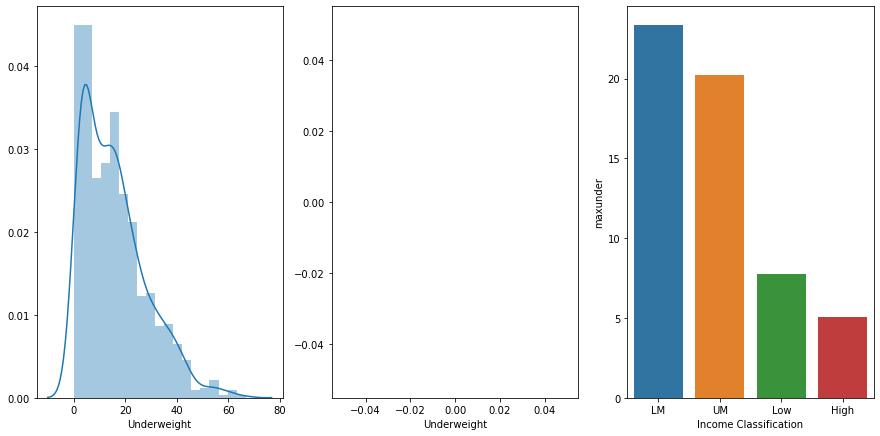

In [36]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
sns.distplot(data['Underweight'], ax=ax1)

df_LM = data.loc[data['Income Classification'] == 'Lower Middle Income']
df_UM = data.loc[data['Income Classification'] == 'Upper Middle Income']
df_Low = data.loc[data['Income Classification'] == 'Low Income']
df_High = data.loc[data['Income Classification'] == 'High Income']

sns.distplot( df_LM['Underweight'],ax = ax2 , color = 'r')
sns.distplot( df_UM['Underweight'],ax = ax2, color = 'g')
sns.distplot( df_Low['Underweight'],ax = ax2, color = 'b')
sns.distplot( df_High['Underweight'],ax = ax2, color = 'y')

df = data.loc[:,['Income Classification','Underweight']]
df['maxunder'] = df.groupby('Income Classification')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()
df = data.loc[:,['Income Classification','Underweight']]
df['maxunder'] = df.groupby('Income Classification')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='Income Classification', y='maxunder')
fig.set(xticklabels = ['LM', 'UM', 'Low', "High"])
plt.show()

nous pouvons constatez qu'il sagit bien de Lower Middle Income qui représente le  Revenu intermédiaire inférieur

### Le pourcentage de sous-pondération dans les pays les moins avancés par rapport aux pays développés

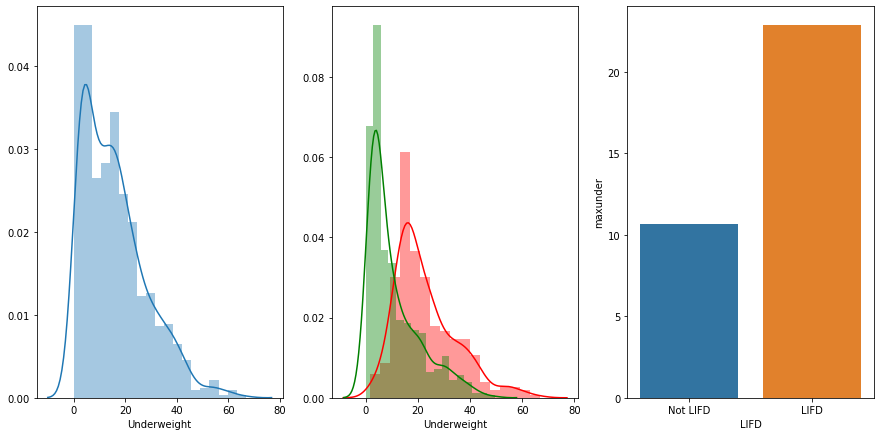

In [37]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
df_with_LIFD = data.loc[data['LIFD'] == 1]
df_with_NLIFD = data.loc[data['LIFD'] == 0]

sns.distplot(data['Underweight'], ax=ax1)
sns.distplot( df_with_LIFD['Underweight'],ax = ax2 , color = 'r')
sns.distplot( df_with_NLIFD['Underweight'],ax = ax2, color = 'g')

df = data.loc[:,['LIFD','Underweight']]
df['maxunder'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()
df = data.loc[:,['LIFD','Underweight']]
df['maxunder'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='LIFD', y='maxunder')
fig.set(xticklabels = ['Not LIFD', 'LIFD'])
plt.show()

##### Observation:nous constatons que les pays les moins avancé présente un pourcentage  de sous-pondérations beaucoup plus important que les pays développés.

### Analyse de la sous-pondération selon le groupe de revenu

In [38]:
#afficher les valeurs présentant l'indice de Classification des revenus
data["Income Classification"].value_counts()

1    335
2    281
0    225
3     83
Name: Income Classification, dtype: int64

#### Severe Wasting(Dépérissement grave)

Il s'agit du% d'enfants âgés de 0 à 59 mois qui ont moins de trois écarts-types par rapport au poids médian pour la taille ¶

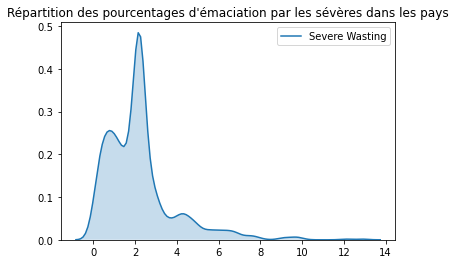

In [39]:
sns.kdeplot(data=data['Severe Wasting'], shade=True)
plt.title("Répartition des pourcentages d'émaciation par les sévères dans les pays")
plt.show()

Nous pouvons remarquer à partir du diagramme de distribution que les valeurs en pourcentage peuvent atteindre 12% dans certains pays.

### Population U5

###### Population  âgée de moins de 5 ans des pays

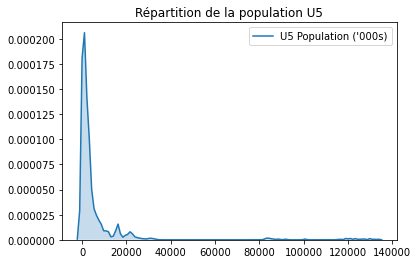

In [40]:
sns.kdeplot(data=data['U5 Population (\'000s)'], shade=True)
plt.title('Répartition de la population U5')
plt.show()

on constate une présense forte de la maladie dans les pays dont la population de moins de 5 est entre 0 et 2000 ,tandis que dans les pays dont la U5 dépasse 4000 la maladie n'y est présque pas présent  .
Donc nous pouvons en déduire que la maladie est due à la diminution de cette population de U5 puisqu'elle a tendace à etre mortelle chez les U5 . 

### Relation entre le pourcentage d'insuffisance pondérale et la population U5

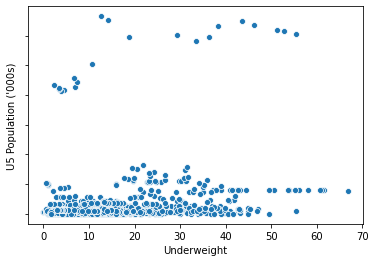

In [41]:
fig = sns.scatterplot(data=data, x='Underweight', y='U5 Population (\'000s)')
fig.set(yticklabels=[])
plt.show()

On peut clairement remarquer que pour les populations les plus élevées, le pourcentage d'insuffisance pondérale est également assez élevé.



### Quel pays affiche le taux d'insuffisance pondérale le plus élevé?

In [42]:
df = data.loc[:,['Country','Underweight','U5 Population (\'000s)']]
df['underweight_count'] = (df['U5 Population (\'000s)'] * df['Underweight'])/100
df.drop(['Underweight','U5 Population (\'000s)'], axis=1, inplace=True)
df['undermean'] = df.groupby('Country')['underweight_count'].transform('mean')
df = df.drop('underweight_count', axis=1).drop_duplicates().sort_values('undermean', ascending=False).head()

fig = px.pie(df, names='Country', values='undermean', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

on peut directement constater qu'il sagit de l'Inde qui occupe presque la totalité du diagramme .
##### La raison de ce pourcentage exceptionnel peut être due au dénombrement de la population ou à tout autre facteur.